# Abalone Dataset
## Target Variable -> Rings
Rings / integer / -- / +1.5 gives the age in years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.rcParams['figure.figsize'] = [15,8]

import warnings
warnings.filterwarnings('ignore')

from pivottablejs import pivot_ui

In [2]:
df = pd.read_csv('Abalone_data.csv')

In [3]:
pivot_ui(df)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# Checking the missing values
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [9]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


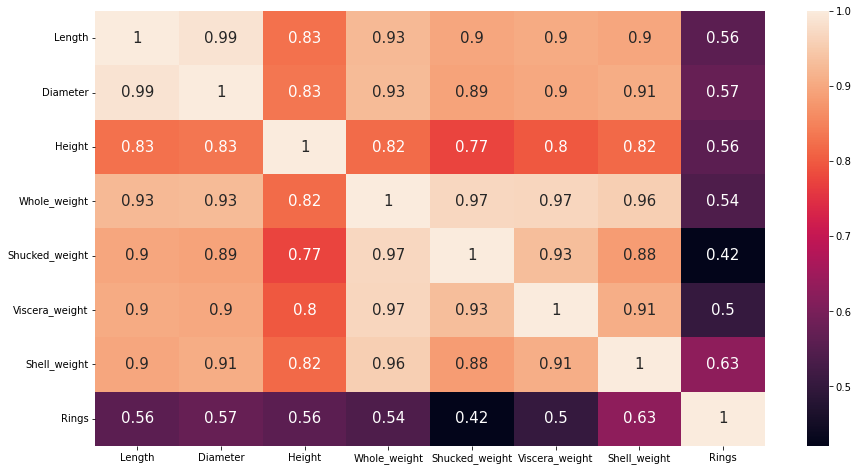

In [10]:
sns.heatmap(df.corr(), annot = True, annot_kws={'size':15})
plt.show()

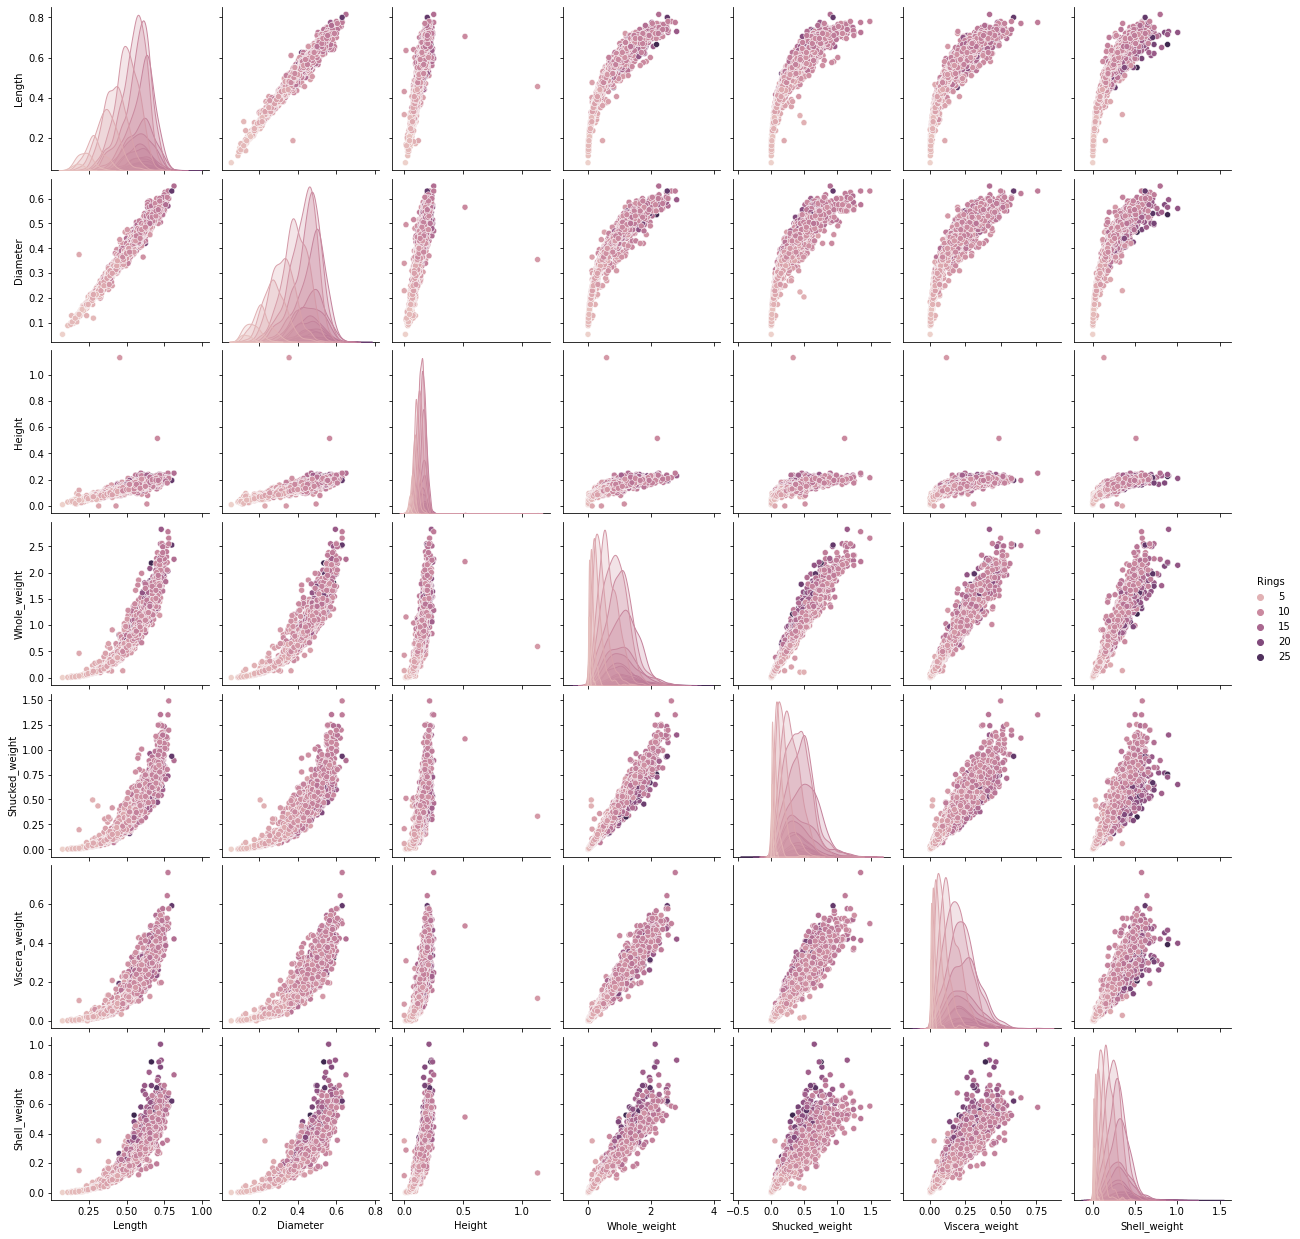

In [11]:
sns.pairplot(df, hue='Rings')
plt.show()

In [12]:
df_numeric = df.select_dtypes(include = np.number)
df_categorical = df.select_dtypes(include = 'O')

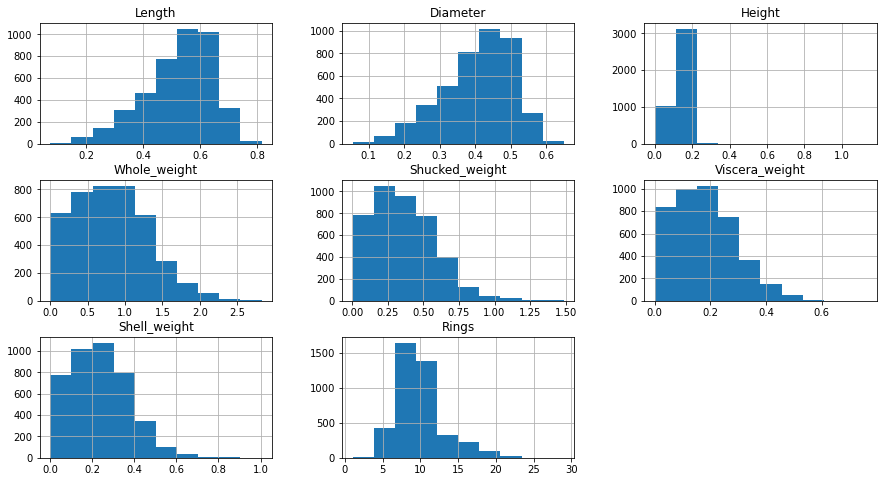

In [13]:
# Plotting the histogram for checking the dataset normallity.
df_numeric.hist()
plt.show()

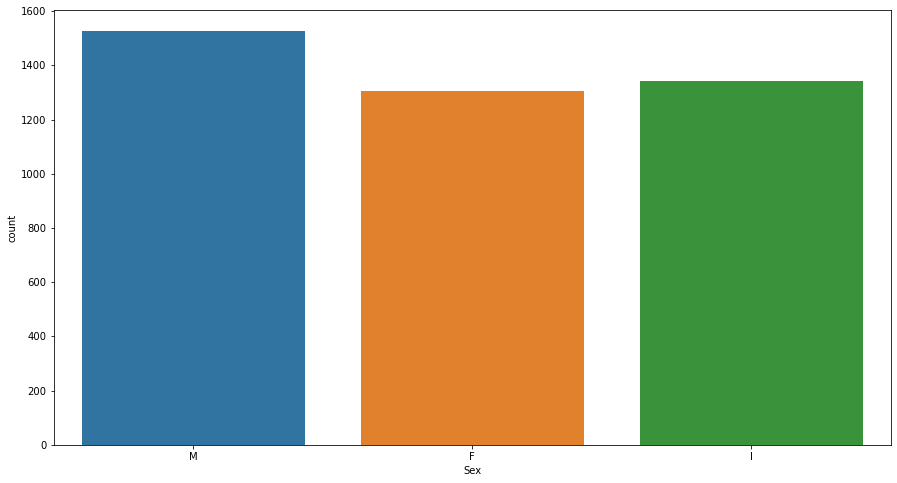

In [14]:
sns.countplot(df_categorical['Sex'])
plt.show()

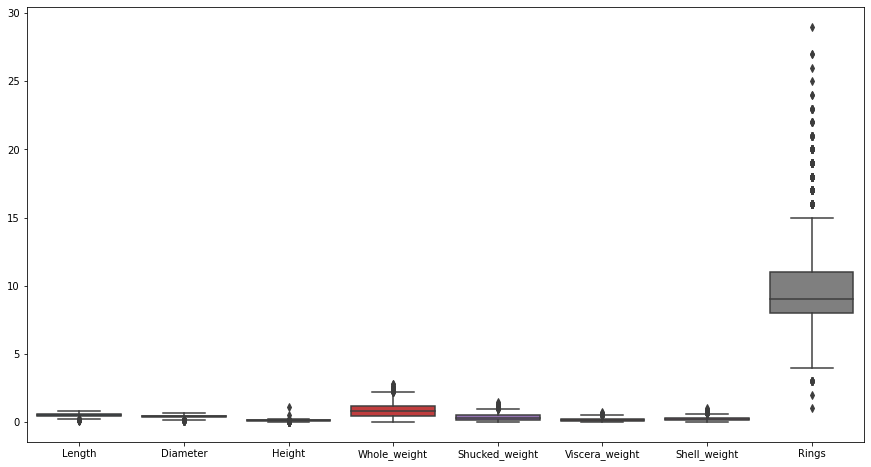

In [15]:
sns.boxplot(data = df_numeric)
plt.show()

In [16]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

IQR = Q3-Q1
print("IQR:",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print("Lower_Bound", lower_bound)
print("Upper_Bound", upper_bound)

IQR: Length            0.1650
Diameter          0.1300
Height            0.0500
Whole_weight      0.7115
Shucked_weight    0.3160
Viscera_weight    0.1595
Shell_weight      0.1990
Rings             3.0000
dtype: float64
Lower_Bound Length            0.20250
Diameter          0.15500
Height            0.04000
Whole_weight     -0.62575
Shucked_weight   -0.28800
Viscera_weight   -0.14575
Shell_weight     -0.16850
Rings             3.50000
dtype: float64
Upper_Bound Length             0.86250
Diameter           0.67500
Height             0.24000
Whole_weight       2.22025
Shucked_weight     0.97600
Viscera_weight     0.49225
Shell_weight       0.62750
Rings             15.50000
dtype: float64


In [17]:
df_numeric = df_numeric[(df_numeric > lower_bound) & (df_numeric < upper_bound)]

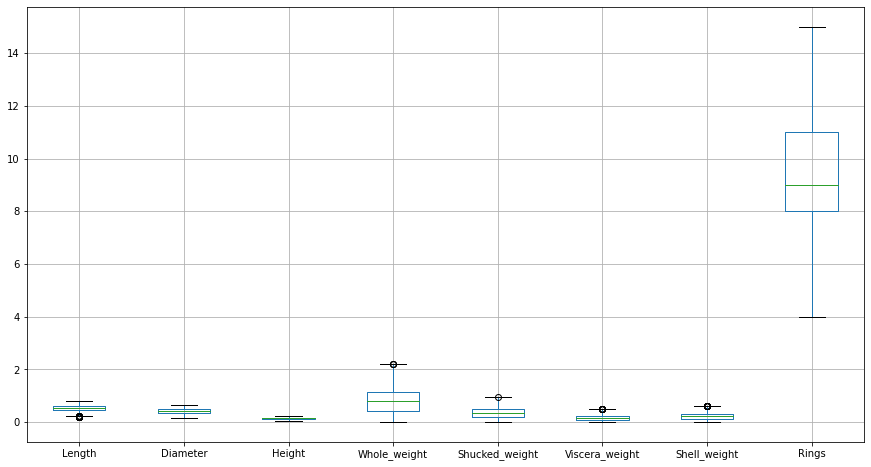

In [18]:
df_numeric.boxplot()
plt.show()

In [19]:
df_numeric.shape

(4177, 8)

In [20]:
df_numeric.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
#df_categorical = pd.get_dummies(df["Sex"], drop_first=True)
df["Sex"] = encoder.fit_transform(df["Sex"])

In [23]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
#df_new = pd.concat([df_categorical, df_numeric], axis=1)
df_new = df.copy(deep=True)

In [25]:
df_new.shape

(4177, 9)

In [26]:
df_new.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [27]:
df_new.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [28]:
# removing the missing values from the dataset.
#df_cleaned = df_new.dropna()

In [29]:
#df_cleaned.shape

In [30]:
#df_cleaned.head()

In [31]:
# Distributing the dataset into "Dependent" and "Independent" variables.
#x = df_cleaned.iloc[:,0:9]
#y = df_cleaned['Rings']
x = df_new.iloc[:,0:8]
y = df_new["Rings"]

In [32]:
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [33]:
print("X_Shape:-", x.shape)
print("Y_Shape:-", y.shape)

X_Shape:- (4177, 8)
Y_Shape:- (4177,)


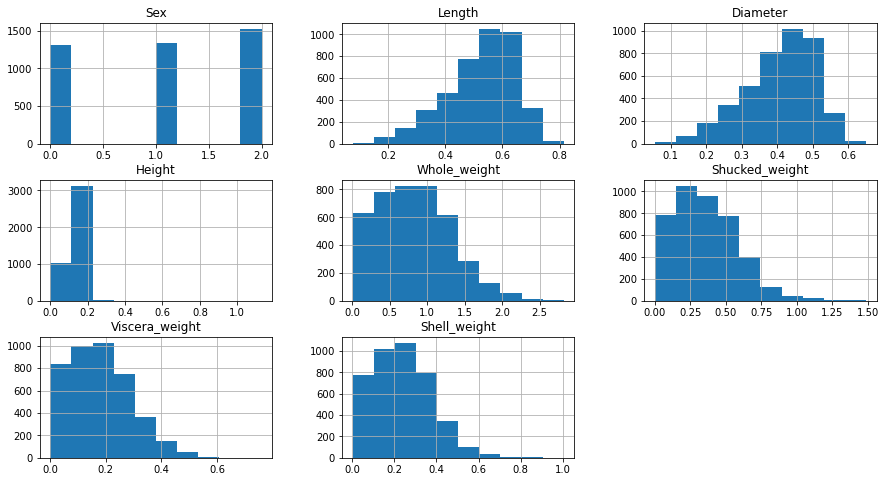

In [34]:
x.hist()
plt.show()

In [35]:
# Importing all the necessary libaraies from the "sklearn" library, for model building,
# and dataset splitting into "train" and "test",
# and all the necessary "metrics" packages,
# for calculating the evaluation.

from sklearn.model_selection import train_test_split

# Importing all the necessary Evaluation Metrics
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing "preprocessing" package from "Sklearn" library,
# for nirmalising the dataset.

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
# Splitting the dataset into "train" and "test" sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=42)
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2923, 8)
X_test: (1254, 8)
Y_train: (2923,)
Y_test: (1254,)


In [38]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [39]:
# Importing classification algorithms for the calssifying the dataset.

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor

In [40]:
# Comparing multiple models accuracy for deciding which one's are giving the highest accuracy.
# and the model which gives the highest accuracy, we will choose that model.

model = [DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),
         AdaBoostRegressor(),LinearSVR(),GaussianNB(),LinearRegression(),LogisticRegression(), 
         Ridge(), BaggingRegressor()]

for mod in model:
    regression = mod
    regression = regression.fit(x_train,y_train)
    print(mod,"======>>" ,'Accuracy:', regression.score(x_test,y_test))

DecisionTreeRegressor() ======>> Accuracy: -0.6736539688495966
KNeighborsRegressor() ======>> Accuracy: 0.3555835383866587
RandomForestRegressor() ======>> Accuracy: 0.14222113272099968
AdaBoostRegressor() ======>> Accuracy: -0.7464573498060025
LinearSVR() ======>> Accuracy: 0.49287254591263385
GaussianNB() ======>> Accuracy: 0.1762360446570973
LinearRegression() ======>> Accuracy: 0.41912713379715605
LogisticRegression() ======>> Accuracy: 0.24800637958532695
Ridge() ======>> Accuracy: 0.43311625145755306
BaggingRegressor() ======>> Accuracy: 0.24417859015328192


In [41]:
LR_model = LinearSVR().fit(x_train, y_train)

In [42]:
y_pred = LR_model.predict(x_test)

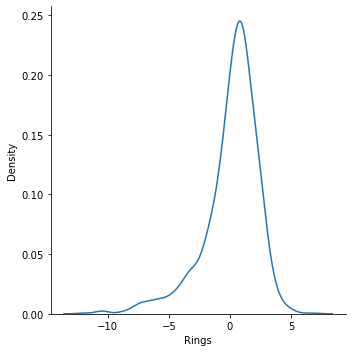

In [43]:
# Creating a displot form getting the error distribution
sns.displot(y_pred-y_test, kind='kde')
plt.show()

In [44]:
# Printing all the linear model scores.
print("R2 Score:",r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.4919414762845852
MSE: 5.159109446661644
MAE: 1.6622883563954836
RMSE: 2.271367307738148


# Conclusion

In [45]:
#Although i have tried many concepts but the accuracy is still the same it did not varied much so i had,
#just end my model here only beacuse,the dataset is not fully accurate there many corrections that,
#needed to be done in the raw data.